In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lorenz
import rc
import prediction_analysis

# Lorenz system

In [2]:
n_step, dt = 70000, 0.02
X, t = lorenz.solve(n_step, dt, init_cond=(1,1,1))

Text(0.5, 0, '$t$')

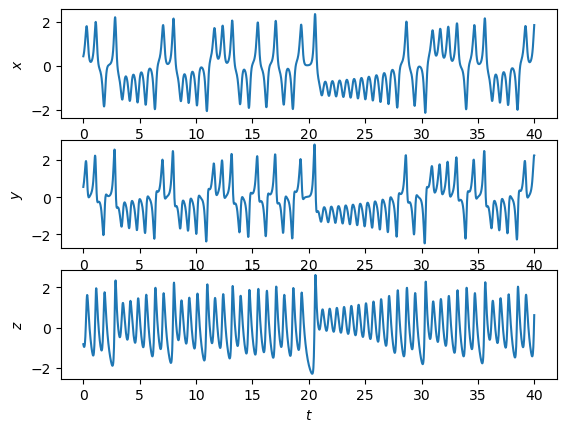

In [3]:
# Plot of x, y, z components vs. time
x, y, z = X

fig, axs = plt.subplots(3,1)
axs[0].plot(t[:2000], x[:2000])
axs[1].plot(t[:2000], y[:2000])
axs[2].plot(t[:2000], z[:2000])
axs[0].set_ylabel('$x$')
axs[1].set_ylabel('$y$')
axs[2].set_ylabel('$z$')
axs[2].set_xlabel('$t$')

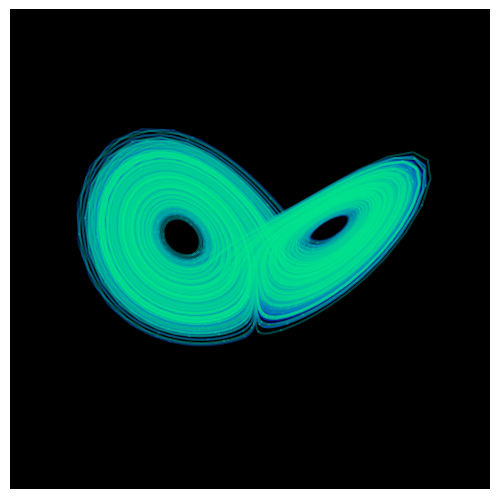

In [4]:
# 3D plot of the Lorenz attractor
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
s = 10
cmap = plt.cm.winter
for i in range(0,n_step-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n_step), alpha=0.4)
ax.set_axis_off()
plt.show()

## Train-test split

In [5]:
num_training_timesteps = 30000
X_train, X_test = np.hsplit(X, [num_training_timesteps])

# Reservoir computer

In [6]:
h = rc.Hyperparameters(N=500, degree=2.6667, sigma=0.5, beta=0.00003, dt=dt,
                       train_length=num_training_timesteps, prediction_steps=1000)

In [7]:
W_out, A, W_in, training_res_states = rc.train_RC(X_train, h)

In [8]:
predictions = rc.predict(W_out, A, W_in, training_res_states, h)
actual = X_test[:, :h.prediction_steps]

In [10]:
t_pred = np.linspace(0, h.prediction_steps * h.dt - h.dt, h.prediction_steps)
t_pred /= lorenz.lyapunov_time  # scale to Lyapunov times

valid_time = prediction_analysis.valid_time(predictions, actual, t_pred)

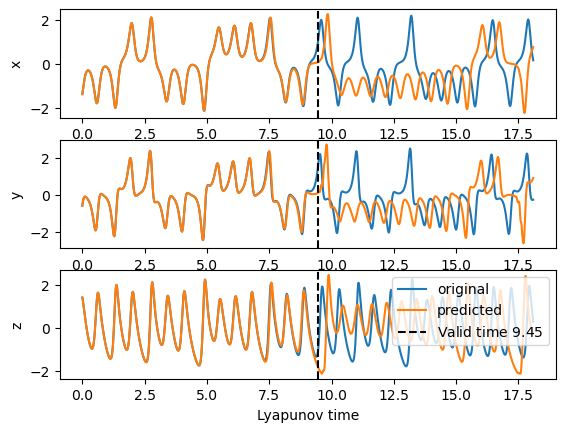

In [11]:
fig, axs = plt.subplots(3, 1)

for i in range(3):
    axs[i].plot(t_pred, actual[i], label='original')
    axs[i].plot(t_pred, predictions[i], label='predicted')
    axs[i].set_ylabel(chr(ord('x') + i))
    axs[i].set_xlabel('Lyapunov time')
    axs[i].axvline(valid_time, ls='--', color='k', label = rf'Valid time ${valid_time:.2f}$')

plt.legend(loc='upper right')